# Data Exploration

## Library imports

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import importlib 

from pathlib import Path 

In [4]:
# import other libraries 
# check if jcds library is installed
package_name = "jcds"

if importlib.util.find_spec(package_name) is None:
    print(f" '{package_name}' not found. Installing from Github... ")
    subprocess.check_call(
        [
            sys.executable,
            "-m",
            "pip",
            "install",
            "https://github.com/junclemente/jcds.git",
        ]
    )
else:
    print(f" '{package_name}' is already installed.")

from jcds import eda as jeda
from jcds import reports as jrep

 'jcds' is already installed.


## Import dataset

In [6]:
data_folder = Path("../data")

df = pd.read_pickle(data_folder / "ews_dataset.pkl")

df.head()

,cdscode,county,charter,eilcode,virtual,magnet,yearroundyn,latitude,longitude,multilingual,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,01611190130229,Alameda,N,HS,N,N,N,37.764958,-122.24593,N,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,01611270130450,Alameda,N,HS,N,N,N,37.896661,-122.29257,N,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,01611430131177,Alameda,N,HS,N,N,N,37.868913,-122.27120,Y,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,01611500132225,Alameda,N,HS,N,N,N,37.705184,-122.07847,N,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,01611500133876,Alameda,N,HS,V,N,N,37.713501,-122.09222,N,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


## Basic dataset info

In [15]:
jrep.data_info(df, show_columns=True)


SHAPE:
There are 1067 rows and 50 columns (1.63 MB).

DUPLICATES:
There are 0 duplicated rows.

COLUMNS/VARIABLES:
Column dType Summary:
 * object: 25
 * float: 25
There are 25 numerical (int/float/bool) variables.
 * Columns: ['percent__eligible_free_k12', 'frpm_count_k12', 'pct_associate', 'pct_bachelors', 'pct_bachelors_plus', 'pct_master', 'pct_master_plus', 'pct_doctorate', 'pct_juris_doctor', 'pct_no_degree', 'pct_experienced', 'pct_inexperienced', 'pct_first_year', 'pct_second_year', 'grade_retention_ratio', 'pct_hs_enrollment', 'pct_senior_cohort', 'pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'avg_safety_score', 'high_conn', 'low_conn', 'conn_ratio', 'school_climate_index']
There are 25 categorical (nominal/ordinal) variables.
 * Columns: ['cdscode', 'county', 'charter', 'eilcode', 'virtual', 'magnet', 'yearroundyn', 'latitude', 'longitude', 'multilingual', 'cohortstudents', 'regular_hs_diploma_graduates_rate', 'met_uccsu_grad_reqs_rate', 'seal_of_biliteracy_rate', 

In [16]:
jrep.data_cardinality(df, show_columns=True)

CARDINALITY REPORT

Total columns analyzed: 50

[BINARY COLUMNS]
There are 1 binary columns.
 * Columns: ['yearroundyn']
There are 0 binary with nan.

[CONSTANT/NEAR CONSTANT COLUMNS]
There are 5 constant columns.
 * Columns: ['charter', 'eilcode', 'high_conn', 'low_conn', 'conn_ratio']
There are 11 near-constant columns with >= 95% of values being the same.
 * Columns: ['charter', 'eilcode', 'yearroundyn', 'calpads_fall_1_certification_status', 'school_grade_span', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio', 'high_conn', 'low_conn', 'conn_ratio']

[LOW CARDINALITY CATEGORICAL COLUMNS]
 * There are 8 low cardinality columns with <= 10 unique values.
Columns:
 * charter: 1 unique values
 * eilcode: 1 unique values
 * virtual: 3 unique values
 * magnet: 3 unique values
 * yearroundyn: 2 unique values
 * multilingual: 3 unique values
 * calpads_fall_1_certification_status: 1 unique values
 * school_grade_span: 1 unique values

[HIGH CARDINALITY CATEGORICAL COLUMNS]
 * There are 3 h

The following features can be removed from the dataset due to having only one value:
- charter
- eilcode
- calpads_fall_1_certification_status
- school_grade_span


In [13]:
jrep.data_quality(df, show_columns=True) 

DATA QUALITY REPORT

 * Total entries (rows * cols): 53350
 * Memory usage: 1.63 MB
 * Rows: 1067
 * Columns: 50

MISSING DATA:
 * Total entries: 6752 missing (12.7%)

ROWS:
----------
 * Rows missing any: 1067
 * Rows missing all: 0

DUPLICATES: 0

COLUMNS:
----------------
Columns missing any: 37
	'school_grade_span': 1024 missing (96.0%)
	'stu_tch_ratio': 1024 missing (96.0%)
	'stu_adm_ratio': 1024 missing (96.0%)
	'stu_psv_ratio': 1024 missing (96.0%)
	'pct_unsafe_gr11': 172 missing (16.1%)
	'pct_safe_gr11': 172 missing (16.1%)
	'pct_neutral_gr11': 172 missing (16.1%)
	'avg_safety_score': 123 missing (11.5%)
	'school_climate_index': 123 missing (11.5%)
	'pct_associate': 96 missing (9.0%)
	'pct_bachelors': 96 missing (9.0%)
	'pct_bachelors_plus': 96 missing (9.0%)
	'pct_master': 96 missing (9.0%)
	'pct_master_plus': 96 missing (9.0%)
	'pct_doctorate': 96 missing (9.0%)
	'pct_juris_doctor': 96 missing (9.0%)
	'pct_no_degree': 96 missing (9.0%)
	'pct_experienced': 96 missing (9.0%)
	'

In [21]:
# list features and target
# removed columns with only one value 
target = "regular_hs_diploma_graduates_rate"
num_cols = ['percent__eligible_free_k12', 'frpm_count_k12', 'pct_associate', 'pct_bachelors', 'pct_bachelors_plus', 'pct_master', 'pct_master_plus', 'pct_doctorate', 'pct_juris_doctor', 'pct_no_degree', 'pct_experienced', 'pct_inexperienced', 'pct_first_year', 'pct_second_year', 'grade_retention_ratio', 'pct_hs_enrollment', 'pct_senior_cohort', 'pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'avg_safety_score', 'high_conn', 'low_conn', 'conn_ratio', 'school_climate_index']


cat_cols = ['cdscode', 'county', 'virtual', 'magnet', 'yearroundyn', 'latitude', 'longitude', 'multilingual', 'cohortstudents', 'regular_hs_diploma_graduates_rate', 'met_uccsu_grad_reqs_rate', 'seal_of_biliteracy_rate', 'dropout_rate', 'still_enrolled_rate', 'chronicabsenteeismrate', 'eligible_cumulative_enrollment', 'unexcused_absences_percent', 'outofschool_suspension_absences_percent', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio']

In [22]:
df[num_cols].head()

,percent__eligible_free_k12,frpm_count_k12,pct_associate,pct_bachelors,pct_bachelors_plus,pct_master,pct_master_plus,pct_doctorate,pct_juris_doctor,pct_no_degree,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,0.172013,327.0,0.0,0.126316,0.315789,0.126316,0.347368,0.021053,0.0,0.063158,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,0.174389,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,0.262259,935.0,0.0,0.427966,0.148305,0.360169,0.046610,0.016949,0.0,0.000000,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,0.166358,491.0,0.0,0.187919,0.315436,0.161074,0.315436,0.020134,0.0,0.000000,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,0.273810,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


In [23]:
df[cat_cols].head()

,cdscode,county,virtual,magnet,yearroundyn,latitude,longitude,multilingual,cohortstudents,regular_hs_diploma_graduates_rate,...,seal_of_biliteracy_rate,dropout_rate,still_enrolled_rate,chronicabsenteeismrate,eligible_cumulative_enrollment,unexcused_absences_percent,outofschool_suspension_absences_percent,stu_tch_ratio,stu_adm_ratio,stu_psv_ratio
0,01611190130229,Alameda,N,N,N,37.764958,-122.24593,N,394,92.4,...,22.8,2.3,1.0,12.7,1841,23.5,0.5,NaN,NaN,NaN
1,01611270130450,Alameda,N,N,N,37.896661,-122.29257,N,284,95.1,...,21.5,3.5,0.0,70.3,1192,46.2,0.4,NaN,NaN,NaN
2,01611430131177,Alameda,N,N,N,37.868913,-122.27120,Y,861,90.5,...,12.1,8.1,0.8,5.2,3281,24.1,0,NaN,NaN,NaN
3,01611500132225,Alameda,N,N,N,37.705184,-122.07847,N,672,96.4,...,25.0,2.2,0.0,3.5,2771,28,0.9,NaN,NaN,NaN
4,01611500133876,Alameda,V,N,N,37.713501,-122.09222,N,31,100.0,...,6.5,0.0,0.0,8.3,420,19.1,3.8,17.7,*,224


# Univariate Analysis

## Numerical Features

In [24]:
df_num = df[num_cols].copy()

In [25]:
df_num.describe()

,percent__eligible_free_k12,frpm_count_k12,pct_associate,pct_bachelors,pct_bachelors_plus,pct_master,pct_master_plus,pct_doctorate,pct_juris_doctor,pct_no_degree,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
count,1028.000000,1028.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,...,1028.000000,1028.000000,895.000000,895.000000,895.000000,944.000000,1067.000000,1067.000000,1.067000e+03,944.000000
mean,0.497452,832.185798,0.003991,0.222327,0.255122,0.334973,0.147708,0.016731,0.002030,0.017119,...,0.983842,0.473472,0.084221,0.571122,0.344709,0.034474,0.333333,0.333333,9.999970e-01,0.517237
std,0.239153,609.014452,0.011288,0.173097,0.185428,0.194394,0.176258,0.023368,0.008570,0.060448,...,0.088032,0.066638,0.019620,0.053103,0.038252,0.001868,0.000000,0.000000,1.110744e-16,0.000934
min,0.031670,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.039000,0.404000,0.200000,0.031287,0.333333,0.333333,9.999970e-01,0.515643
25%,0.303059,340.500000,0.000000,0.087596,0.093121,0.181818,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.459631,0.073000,0.542000,0.331000,0.033623,0.333333,0.333333,9.999970e-01,0.516812
50%,0.498480,697.500000,0.000000,0.166667,0.267176,0.340426,0.078125,0.010753,0.000000,0.000000,...,1.000000,0.482263,0.083000,0.565000,0.352000,0.034217,0.333333,0.333333,9.999970e-01,0.517108
75%,0.683675,1248.250000,0.000000,0.343517,0.383993,0.490990,0.230139,0.023529,0.000000,0.014185,...,1.000000,0.500000,0.089000,0.586000,0.358000,0.034490,0.333333,0.333333,9.999970e-01,0.517245
max,1.000000,3760.000000,0.136364,1.000000,1.000000,0.846847,0.805085,0.235294,0.071429,0.897436,...,1.000000,1.000000,0.168000,0.760000,0.436000,0.042390,0.333333,0.333333,9.999970e-01,0.521195


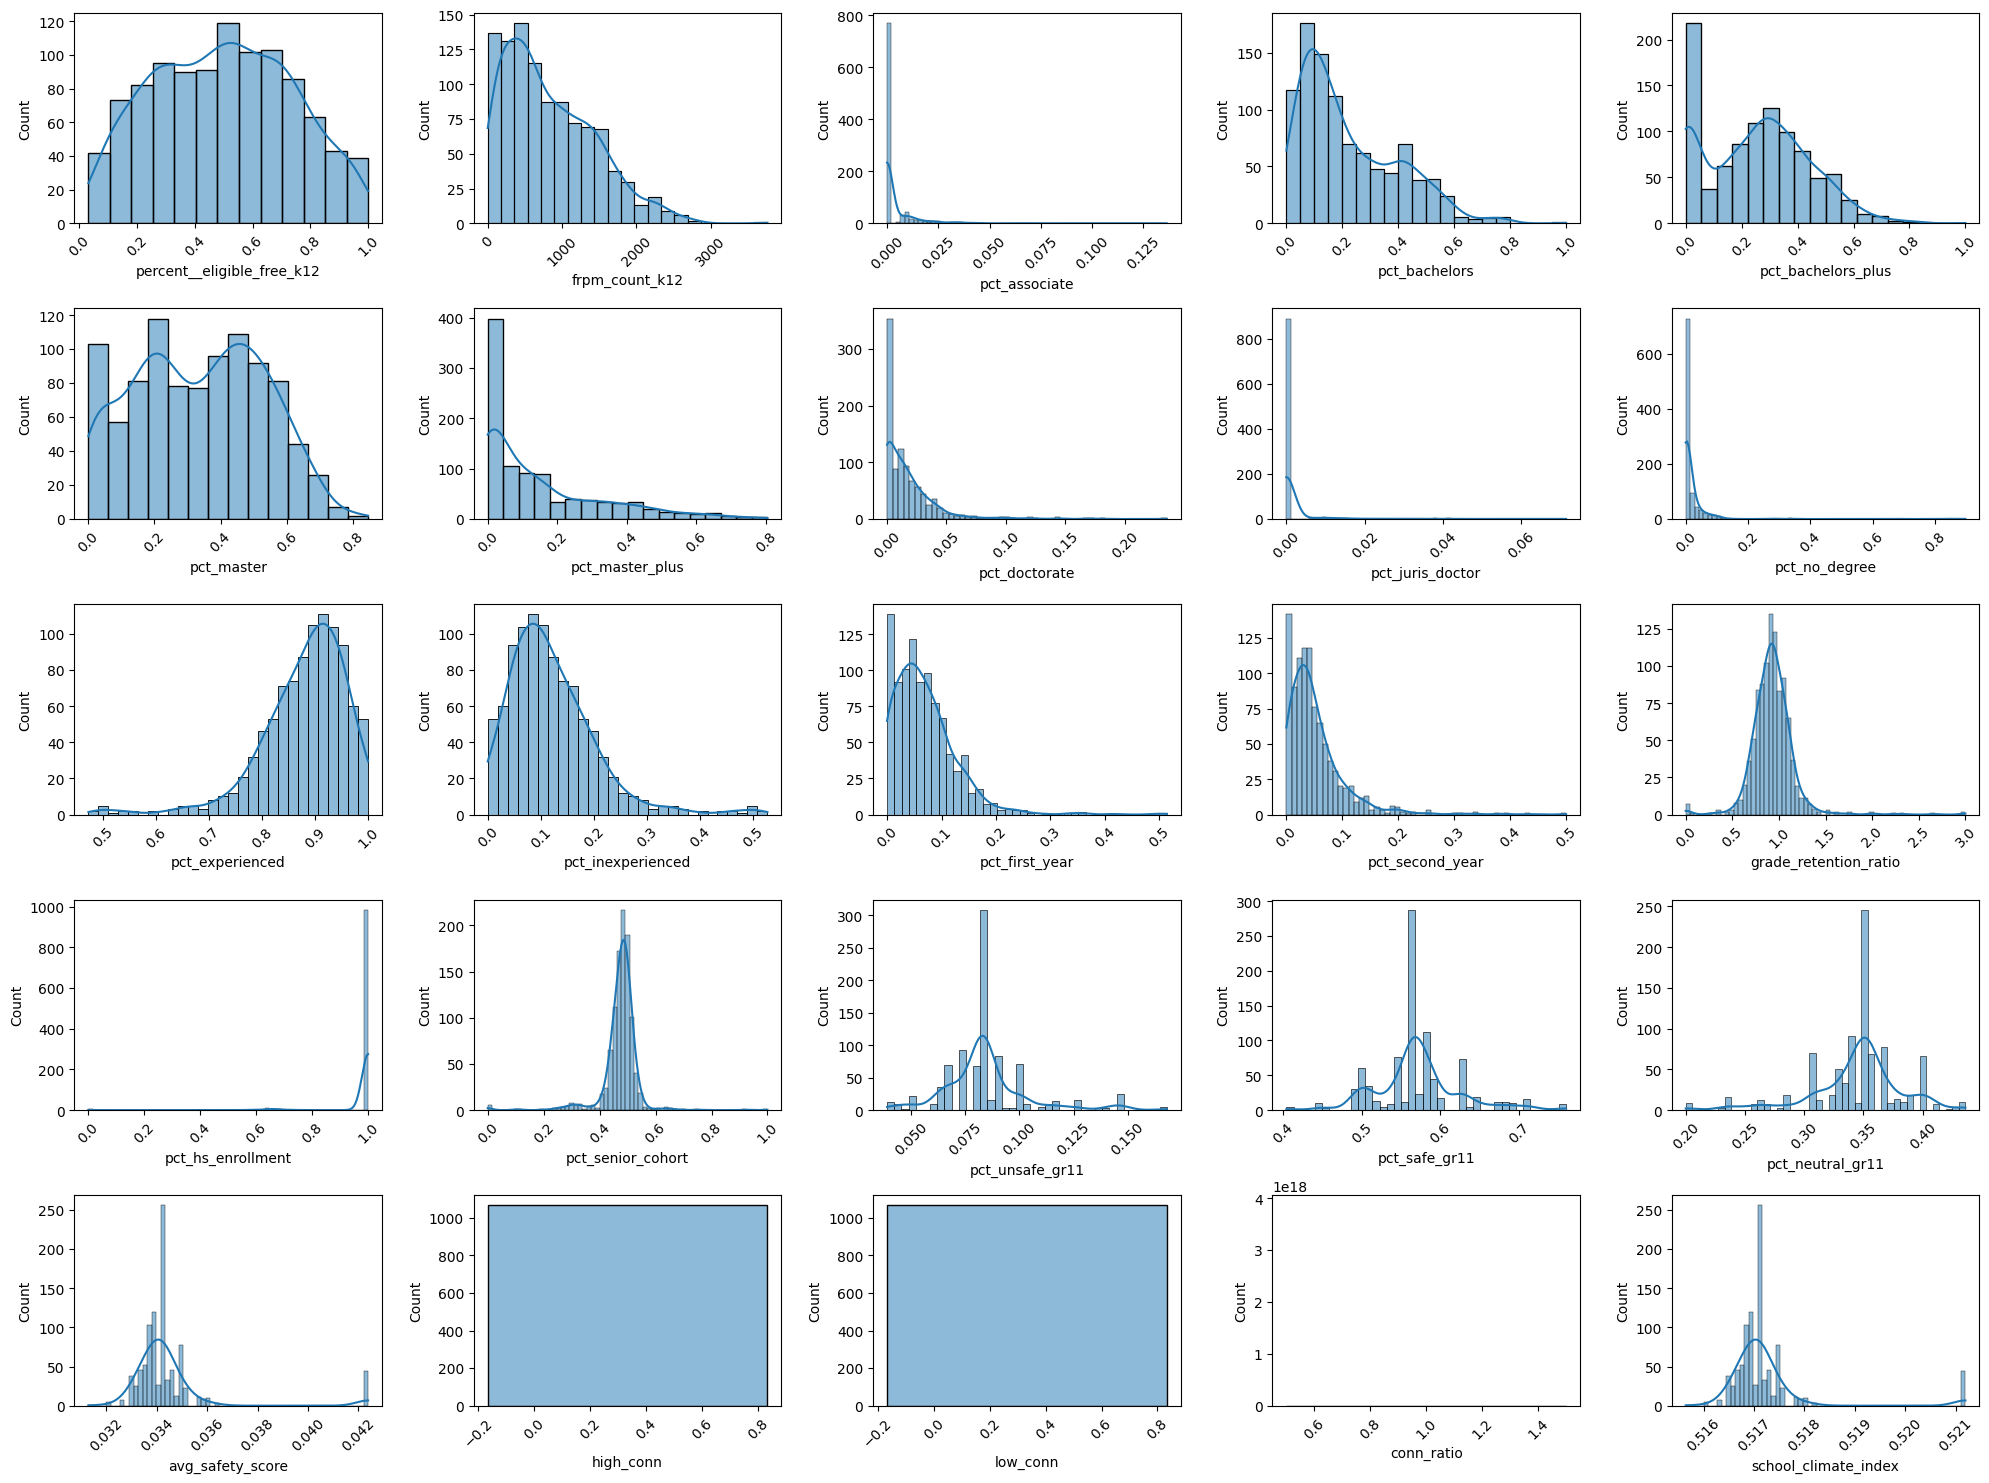

In [ ]:
# 
n_cols = 5
n_rows = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols[: n_cols * n_rows]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()